# PSMILES

[*]CC(c1ccccc1)[*]


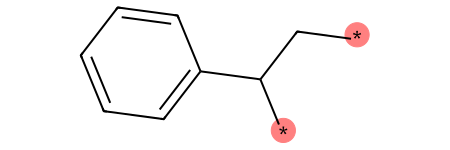

In [1]:
from psmiles import PolymerSmiles as PS

ps = PS("[*]CC(c1ccccc1)[*]")
ps

[*]CC([*])c1ccccc1


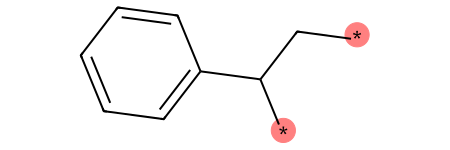

In [2]:
# Canonicalize the PSMILES string.
ps.canonicalize

In [3]:
# Save the figure to disk. Default name to PSMILES string.
# ps.canonicalize.savefig()

C(c1ccccc1)(C[*])[*]


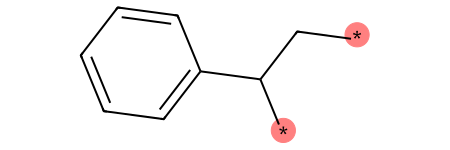

C(C(c1ccccc1)[*])[*]


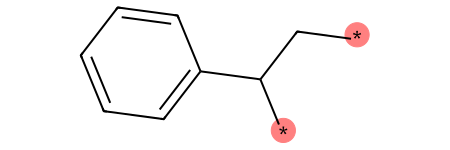

[*]C(C[*])c1ccccc1


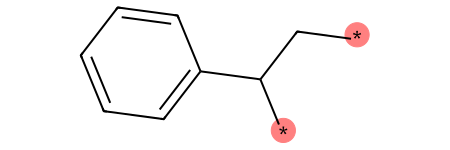

In [4]:
# Randomize the PSMILES string (chemistry is preserved)
_ = [display(ps.randomize) for _ in range(3)]

[*]CC([*])c1ccccc1


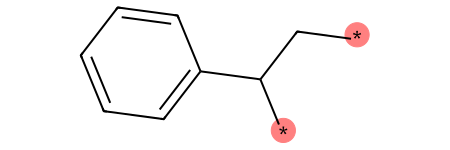

[*]CC([*])c1ccccc1


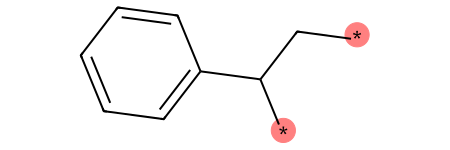

[*]CC([*])c1ccccc1


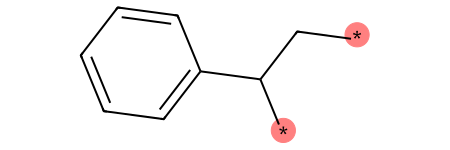

In [5]:
# First randomize then canonicalize the PSMILES strings. The PSMILES strings are the same.
pss = [ps.randomize.canonicalize for _ in range(3)]
[display(_ps) for _ps in pss]
assert len(set([str(_ps) for _ps in pss])) == 1

[*]C(CCC([*])c1ccccc1)c1ccccc1


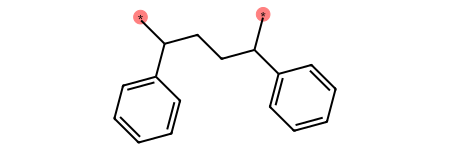

In [6]:
# Get the dimer from the monomer.
# Connect to first star
ps.dimer(0)

[*]CC(CC([*])c1ccccc1)c1ccccc1


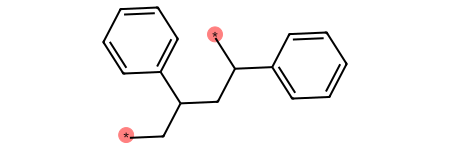

In [7]:
# Connect to second star
ps.dimer(1)

### Fingerprints for PSMILES strings

In [8]:
# CI fingerprint
ps.fingerprint("ci")

array([0, 1, 0, ..., 0, 0, 0], shape=(2048,))

In [9]:
ps.fingerprint("rdkit")

array([0, 0, 0, ..., 0, 0, 0], shape=(2048,))

In [10]:
# polyBERT fingerprint.
# polyBERT is a chemical language model that has learned to predict PSMILES string fingerprints.
# polyBERT is super fast
ps.fingerprint("polyBERT")

AssertionError: PolyBERT fingerprints require the 'sentence-transformers' Python package. Please install with `pip install 'psmiles[polyBERT]@git+https://github.com/kuennethgroup/psmiles.git'` Or `poetry add git+https://github.com/kuennethgroup/psmiles.git -E polyBERT` 

### Canonicalize PSMILES 

set `logging.getLogger().setLevel(logging.DEBUG)` for verbose mode


In [ ]:
# add draw options
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = False
IPythonConsole.drawOptions.minFontSize = 16
IPythonConsole.molSize = (600, 200)  # Change image size
IPythonConsole.ipython_useSVG = True  # Change output to SVG

[*]NC(C)CC([*])=O


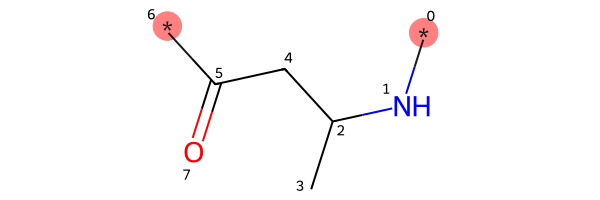

[*]CC(=O)NC([*])C


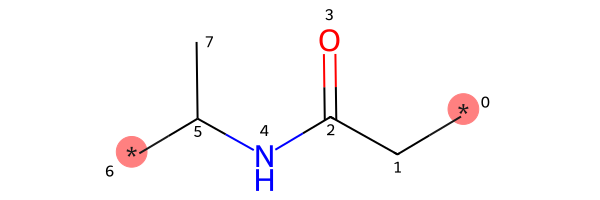

In [ ]:
import logging

# The INFO level does not give any additional information
logging.getLogger().setLevel(logging.INFO)
sm = "[*]NC(C)CC([*])=O"
display(PS(sm))
display(PS(sm).canonicalize)

[*]NC(C)CC([*])=O


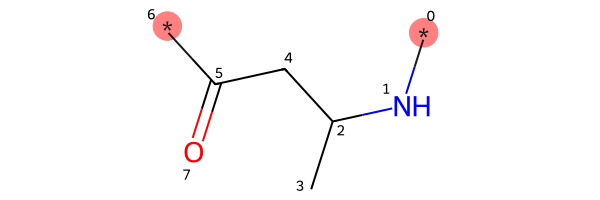

DEBUG:root:(1) Set labels and get connection dict 
 {'atom_rings': (),
 'bond_rings': (),
 'index': [0, 1, 2, 3, 4, 5, 6, 7],
 'neighbor': {'atom_type': [['N'], ['C']],
              'bond_type': [[rdkit.Chem.rdchem.BondType.SINGLE],
                            [rdkit.Chem.rdchem.BondType.SINGLE]],
              'index': [[1], [5]],
              'path': (1, 2, 4, 5)},
 'star': {'atom_type': ['*', '*'], 'bond_type': None, 'index': [0, 6]},
 'stereo': [],
 'symbols': ['*', 'N', 'C', 'C', 'C', 'C', '*', 'O']}


SMILES: *NC(C)CC(*)=O |$;N1;;;;N2;;$,atomProp:0.dummyLabel.*:6.dummyLabel.*|


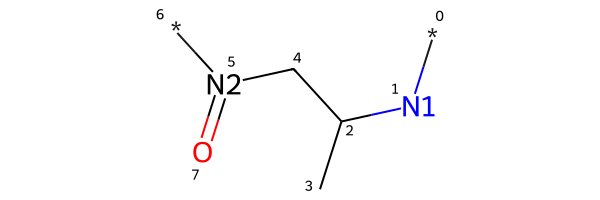

DEBUG:root:(2) Add bond between neighbors [[1], [5]]; bond type SINGLE SINGLE 


SMILES: *N1C(C)CC1(*)=O |$;N1;;;;N2;;$,atomProp:0.dummyLabel.*:6.dummyLabel.*|


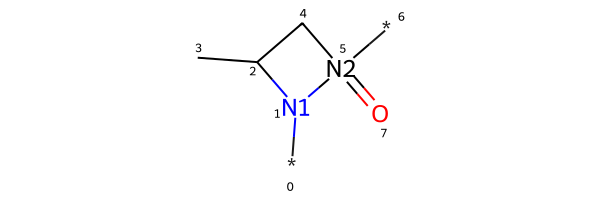

DEBUG:root:(3) Remove stars and bonds


SMILES: CC1CC(=O)N1 |$;;;N2;;N1$|


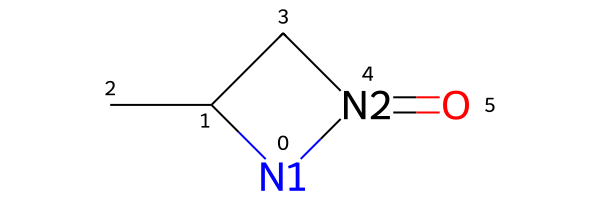

DEBUG:root:(4) Canonicalize


SMILES: CC1CC(=O)N1 |$;;;N2;;N1$|


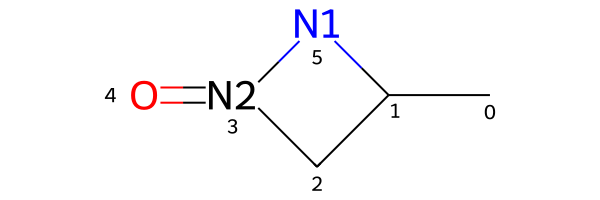

DEBUG:root:Found 1 rings that contain N1 and N2 and have length 4
DEBUG:root:Possible rings to break: [(1, 5, 3, 2)]
DEBUG:root:Searching in ring (sorted index): [1, 2, 3, 5]
DEBUG:root:Index 1 and 2 are in ring and connected with bond 1. Bond 1 is not in other rings. Break.
DEBUG:root:(5) Break bond at atom idx 1 and 2. Bond type was SINGLE


SMILES: CCNC(C)=O |$;;N1;N2;;$|


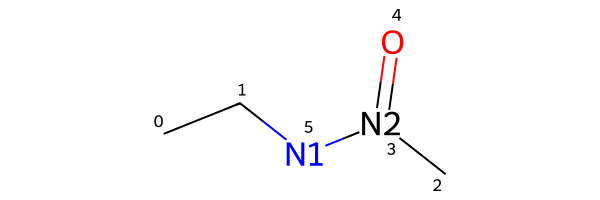

DEBUG:root:(6) Add stars at index 1 and 2 with bond type SINGLE. Renumber atoms.


SMILES: *CC(=O)NC(*)C |atomProp:0.dummyLabel.*:6.dummyLabel.*|


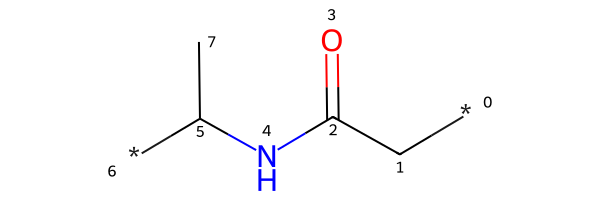

[*]CC(=O)NC([*])C


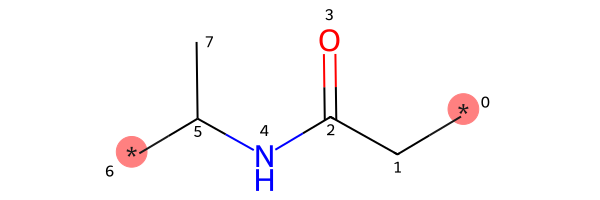

In [ ]:
import logging

# The DEBUG level visualizes the canonicalization process
logging.getLogger().setLevel(logging.DEBUG)
sm = "[*]NC(C)CC([*])=O"
display(PS(sm))
display(PS(sm).canonicalize)

### Inchi string and inchi key of PSMILES string

In [ ]:
logging.getLogger().setLevel(logging.INFO)
ps.inchi

[14:23:42] WARNING: Omitted undefined stereo



'InChI=1S/C8H8At2/c9-6-8(10)7-4-2-1-3-5-7/h1-5,8H,6H2'

In [ ]:
ps.inchi_key

'PYOVDMHONBXEFX-UHFFFAOYSA-N'

###  Alternating copolymers from two PSMILES strings
The second argument of the function alternating_copolymer specifies which how the *s are connected

[*]CC(C)(CCO[*])C(=O)Oc1cccc(C)c1C


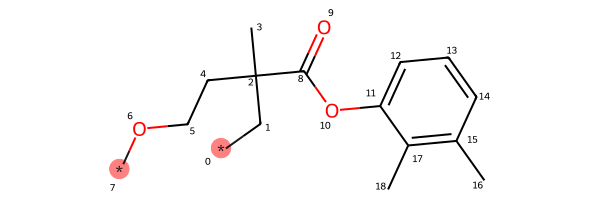

In [ ]:
ps1 = PS("C(C([*])(C([*]))C)(=O)OC1=C(C(=CC=C1)C)C")
ps2 = PS("[*]CCO[*]")
ps1.alternating_copolymer(ps2, [0, 0])

[*]CCOC(C)(C[*])C(=O)Oc1cccc(C)c1C


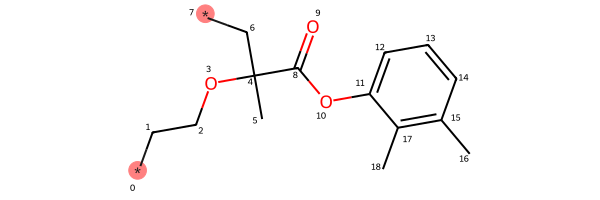

In [ ]:
ps1.alternating_copolymer(ps2, [0, 1])

[*]OCCCC([*])(C)C(=O)Oc1cccc(C)c1C


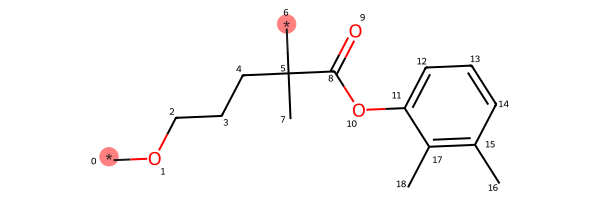

In [ ]:
ps1.alternating_copolymer(ps2, [1, 0])

[*]CCOCC([*])(C)C(=O)Oc1cccc(C)c1C


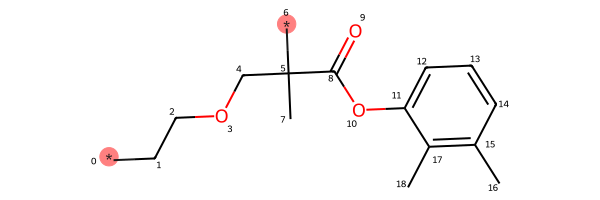

In [ ]:
ps1.alternating_copolymer(ps2, [1, 1])